# 1- Cleaning and Data validation

In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import datetime
import missingno as mn

In [2]:
# giving file path in a variable path
path = 'Files/Customer dataset.xlsx'

# to check sheets name inside excel workbook
print(pd.ExcelFile(path).sheet_names)

['Transactions', 'CustomerDemographic', 'CustomerAddress']


### Loading excel sheet

In [3]:
# loading excel file sheet, we'll use sheet_name parameter, while loading excel file
df=pd.read_excel(path, sheet_name='CustomerDemographic')

In [4]:
# showing first two rows
df.head(2)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11


In [5]:
# to avoid reading first line from excel sheet, we'll use header as a parameter
df=pd.read_excel(path, sheet_name='CustomerDemographic', header=1)
df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0


In [6]:
# showing rows and column of the dataframe
df.shape

(4000, 13)

In [7]:
# to get the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

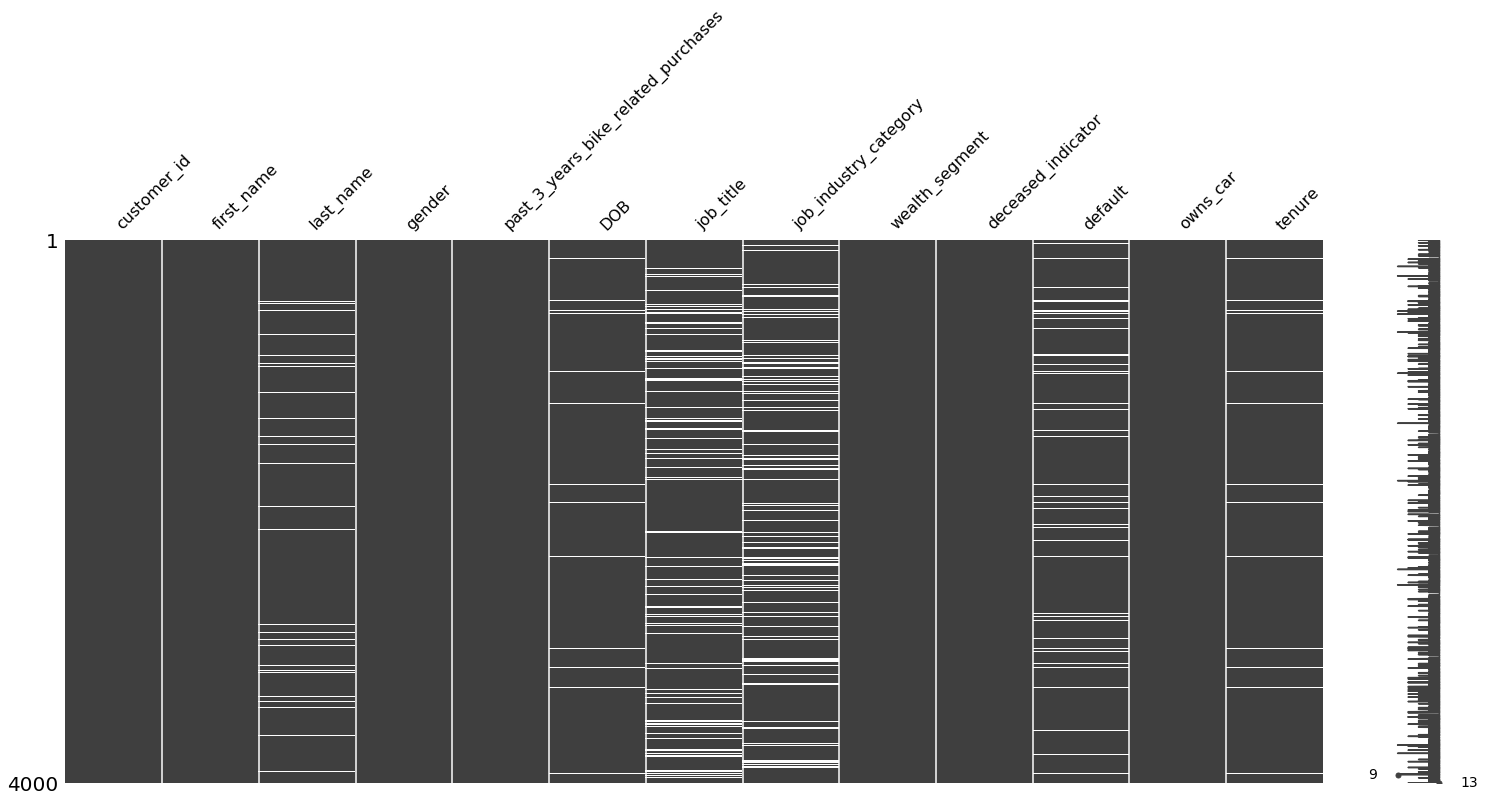

In [8]:
# to check missing value in dataframe in matrix format
mn.matrix(df)

In [9]:
# another way to check the missing value
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

### Handling missing value

In [10]:
# creating a new dataframe to make changes and to keep raw data unchanged
df_cust = df.copy()

In [11]:
df_cust['last_name']

0       Medendorp
1         Bockman
2          Dearle
3             NaN
4          Calton
          ...    
3995     Halgarth
3996       Nisuis
3997      Woolley
3998          NaN
3999      Oldland
Name: last_name, Length: 4000, dtype: object

In [12]:
df_cust.last_name.fillna(' ',inplace=True)
df_cust.last_name

0       Medendorp
1         Bockman
2          Dearle
3                
4          Calton
          ...    
3995     Halgarth
3996       Nisuis
3997      Woolley
3998             
3999      Oldland
Name: last_name, Length: 4000, dtype: object

In [13]:
df_cust['full_name'] = df_cust['first_name'].astype('str')+' '+df_cust['last_name'].astype('str')
df_cust.full_name

0           Laraine Medendorp
1                 Eli Bockman
2                Arlin Dearle
3                    Talbot  
4       Sheila-kathryn Calton
                ...          
3995         Rosalia Halgarth
3996            Blanch Nisuis
3997           Sarene Woolley
3998              Patrizius  
3999            Kippy Oldland
Name: full_name, Length: 4000, dtype: object

In [14]:
# now we'll drop these two columns
df_cust.drop(['first_name','last_name'],axis=1,inplace=True)
df_cust.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'default', 'owns_car', 'tenure', 'full_name'],
      dtype='object')

In [15]:
# we'll chack again missing data
df_cust.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
full_name                                0
dtype: int64

In [16]:
# missing values can be filled by fillna method

df_cust['job_industry_category'].fillna('others',inplace=True)
df_cust['job_title'].fillna('others',inplace=True)

In [17]:
df_cust.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
full_name                                0
dtype: int64

In [18]:
# now we'll check default column
df_cust.default    # this also comes in data validation

0                                                      "'
1                            <script>alert('hi')</script>
2                                     2018-02-01 00:00:00
3       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                     NIL
                              ...                        
3995                                                 -100
3996                                             â¦testâ§
3997                                                  NaN
3998                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
3999                                                  0/0
Name: default, Length: 4000, dtype: object

In [19]:
df_cust.drop('default',axis=1,inplace=True)
df_cust.isnull().sum()

customer_id                             0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    87
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                 87
full_name                               0
dtype: int64

In [20]:
# to remove all the rows, which has null value
df_cust.dropna(inplace=True)  
df_cust.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
full_name                              0
dtype: int64

In [21]:
# showing total rows and column of the dataframe
df_cust.shape

(3913, 11)

In [22]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   gender                               3913 non-null   object        
 2   past_3_years_bike_related_purchases  3913 non-null   int64         
 3   DOB                                  3913 non-null   datetime64[ns]
 4   job_title                            3913 non-null   object        
 5   job_industry_category                3913 non-null   object        
 6   wealth_segment                       3913 non-null   object        
 7   deceased_indicator                   3913 non-null   object        
 8   owns_car                             3913 non-null   object        
 9   tenure                               3913 non-null   float64       
 10  full_name   

In [23]:
df_cust.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli Bockman
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Arlin Dearle
3,4,Male,33,1961-10-03,others,IT,Mass Customer,N,No,7.0,Talbot
4,5,Female,56,1977-05-13,Senior Editor,others,Affluent Customer,N,Yes,8.0,Sheila-kathryn Calton


### Data validation

In [24]:
df_cust.gender.value_counts()

Female    2037
Male      1872
M            1
F            1
Femal        1
U            1
Name: gender, dtype: int64

In [26]:
def gen(val):
    if val == 'Female' or val =='Femal':
        val='F'
    elif val == 'Male':
        val='M'
    return val

In [27]:
df_cust['gender']=df_cust.gender.apply(gen)
df_cust.gender.value_counts()

F    2039
M    1873
U       1
Name: gender, dtype: int64

In [28]:
df_cust.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp
1,2,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli Bockman
2,3,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Arlin Dearle
3,4,M,33,1961-10-03,others,IT,Mass Customer,N,No,7.0,Talbot
4,5,F,56,1977-05-13,Senior Editor,others,Affluent Customer,N,Yes,8.0,Sheila-kathryn Calton


In [29]:
# to find the number of unique values in each column
df_cust.nunique()

customer_id                            3913
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               196
job_industry_category                    10
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
full_name                              3912
dtype: int64

In [30]:
# to check duplicate value
df_cust.duplicated().sum()

0

In [31]:
# to seperate dataframe in categorical data and numerical data
df_cust.select_dtypes(include=['object']).columns

Index(['gender', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'full_name'],
      dtype='object')

In [33]:
df_cust.select_dtypes(exclude=['object']).columns  # or you can use exclude

Index(['customer_id', 'past_3_years_bike_related_purchases', 'DOB', 'tenure'], dtype='object')

In [34]:
# showing statistical summary of the dataframe
df_cust.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,3913.000000,3913.000000,3913.000000
mean,1999.325837,49.041912,10.657041
std,1155.183301,28.764990,5.660146
min,1.000000,0.000000,1.000000
25%,1002.000000,24.000000,6.000000
50%,1999.000000,48.000000,11.000000
75%,2997.000000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [35]:
df_cust.describe(include='all')

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name
count,3913.000000,3913,3913.000000,3913,3913,3913,3913,3913,3913,3913.000000,3913
unique,NaN,3,NaN,3448,196,10,3,2,2,NaN,3912
top,NaN,F,NaN,1978-01-30 00:00:00,others,Manufacturing,Mass Customer,N,Yes,NaN,Corabelle
freq,NaN,2039,NaN,7,497,796,1954,3911,1974,NaN,2
first,NaN,NaN,NaN,1843-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1999.325837,NaN,49.041912,NaN,NaN,NaN,NaN,NaN,NaN,10.657041,NaN
std,1155.183301,NaN,28.764990,NaN,NaN,NaN,NaN,NaN,NaN,5.660146,NaN
min,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,1002.000000,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
